In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('financials.csv')
data = data.dropna()
data.isnull().sum()

data.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          495 non-null    object 
 1   Name            495 non-null    object 
 2   Sector          495 non-null    object 
 3   Price           495 non-null    float64
 4   Price/Earnings  495 non-null    float64
 5   Dividend Yield  495 non-null    float64
 6   Earnings/Share  495 non-null    float64
 7   52 Week Low     495 non-null    float64
 8   52 Week High    495 non-null    float64
 9   Market Cap      495 non-null    float64
 10  EBITDA          495 non-null    float64
 11  Price/Sales     495 non-null    float64
 12  Price/Book      495 non-null    float64
 13  SEC Filings     495 non-null    object 
dtypes: float64(10), object(4)
memory usage: 58.0+ KB


In [4]:
# Sélection des colonnes pertinentes pour le clustering
features = data[["Price/Earnings", "Dividend Yield", "Earnings/Share", "52 Week Low", "52 Week High","Market Cap","EBITDA","Price/Sales","Price/Book"]]
features


,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34
1,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19
3,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14
4,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62
...,...,...,...,...,...,...,...,...,...
500,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31
501,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08
502,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39
503,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42


In [5]:
# Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

In [6]:
# Méthode du coude pour déterminer le meilleur nombre de clusters
inertias = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

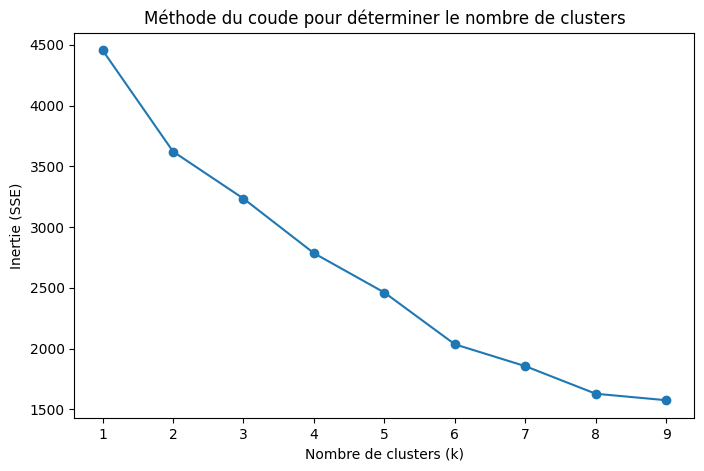

In [7]:
# Afficher la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Méthode du coude pour déterminer le nombre de clusters")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (SSE)")
plt.show()

In [9]:
# Application de K-Means avec le nombre de clusters choisi (par exemple, k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [10]:
# Ajouter les labels des clusters au DataFrame
features["Cluster"] = kmeans.labels_

C:\Users\ADDICHANE\AppData\Local\Temp\ipykernel_1836\1457440819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Cluster"] = kmeans.labels_


In [11]:
# Afficher les premiers résultats

features["Price/Earnings"]


0      24.31
1      27.76
2      22.51
3      19.41
4      25.47
       ...  
500    30.94
501    27.25
502    14.32
503    17.73
504    32.80
Name: Price/Earnings, Length: 495, dtype: float64

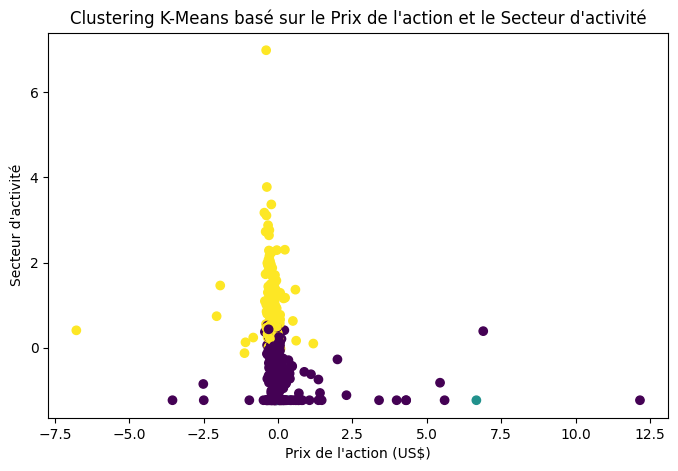

In [17]:
# Visualisation des clusters (2D)
plt.figure(figsize=(8, 5))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap="viridis")
plt.title("Clustering K-Means basé sur le Prix de l'action et le Secteur d'activité")
plt.xlabel("Prix de l'action (US$)")
plt.ylabel("Secteur d'activité")
plt.show()

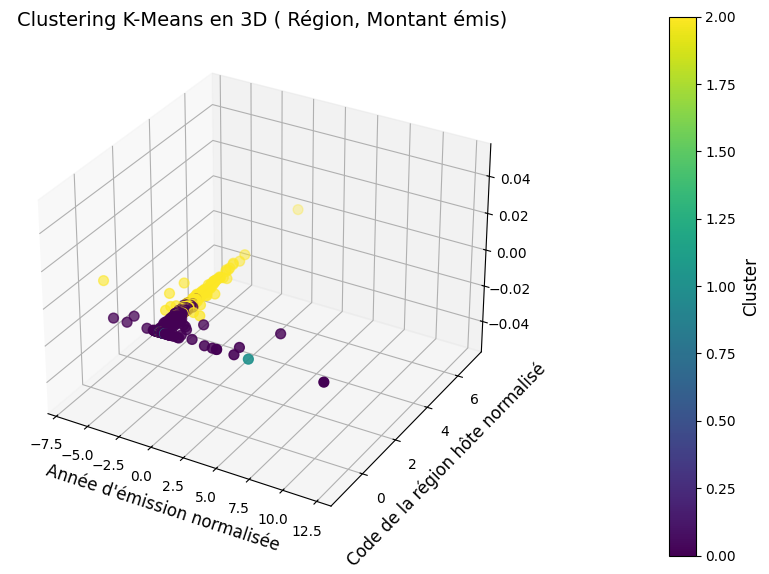

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Visualisation 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot en 3D
scatter = ax.scatter(
    data_scaled[:, 0],  # Feature 1
    data_scaled[:, 1],  # Feature 2
    c=kmeans.labels_,
    cmap="viridis",
    s=50
)

# Ajout des labels et du titre
ax.set_title("Clustering K-Means en 3D ( Région, Montant émis)", fontsize=14)
ax.set_xlabel("Année d'émission normalisée", fontsize=12)
ax.set_ylabel("Code de la région hôte normalisé", fontsize=12)

# Color bar pour les clusters
colorbar = fig.colorbar(scatter, ax=ax, pad=0.2)
colorbar.set_label("Cluster", fontsize=12)

plt.show()

In [25]:
# Affichage des centroïdes
print("Centroides des clusters :\n", kmeans.cluster_centers_)

Centroides des clusters :
 [[ 1.18280991e-01 -5.58207315e-01  8.96936581e-02  6.23149077e-02
   4.00276168e-02 -2.02286949e-01 -2.39534675e-01  7.01685621e-03
  -5.69057924e-02]
 [ 1.40342443e+00 -1.02993686e+00  3.02284267e+00  7.05728006e+00
   7.03272823e+00  6.18692343e+00  4.34608816e+00  5.95714226e-01
  -5.85269779e-02]
 [-2.36772603e-01  9.64586503e-01 -2.33061018e-01 -2.97361076e-01
  -2.59301199e-01  1.70314078e-01  2.83096746e-01 -2.80477923e-02
   9.70640063e-02]]


In [28]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(features, kmeans.labels_)
silhouette

0.17555939123820394